In [9]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv("C:\\Users\\Simon\\PycharmProjects\\NeuronaleNetze\\data\\heart.csv")
#Modify categorical data
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['cp'],dtype="int")
# Drop column B as it is now encoded
data = data.drop('cp',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data = data.sample(frac = 1)
data.columns = data.columns.astype(str)

y = data["output"]
x = data.drop("output", axis=1)

enc = StandardScaler()
x = enc.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [11]:
#ML
model = Sequential()
model.add(Dense(units=12, input_shape=(16,), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.1)

_,accuracy = model.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
6/6 [==============================] - 1s 41ms/step - loss: 0.6669 - accuracy: 0.5789 - val_loss: 0.7373 - val_accuracy: 0.5455
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6367 - accuracy: 0.6000 - val_loss: 0.7206 - val_accuracy: 0.5455
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6299 - accuracy: 0.6263 - val_loss: 0.7030 - val_accuracy: 0.5455
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.6211 - val_loss: 0.6875 - val_accuracy: 0.5909
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6124 - accuracy: 0.7000 - val_loss: 0.6720 - val_accuracy: 0.5909
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6140 - accuracy: 0.6684 - val_loss: 0.6592 - val_accuracy: 0.5455
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.5937 - accuracy: 0.7000 - val_loss: 0.6476 - val_accuracy: 0.5455
Epoch 8/50
6/6 [=================

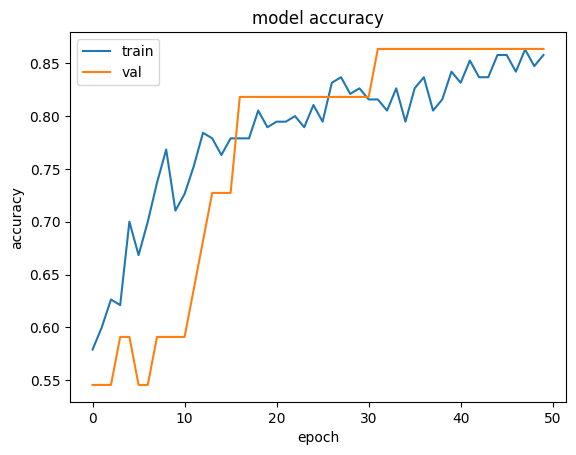

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

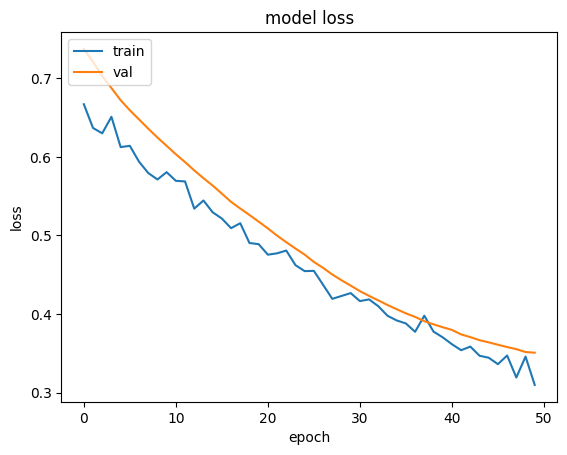

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()